In [29]:
import pandas as pd

In [30]:
data = pd.read_csv(r"C:\Users\Christian Layo\Documents\VSCODE\Life_Expectancy_preprocessed.csv")
data = data.iloc[:, 1:]

data.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,True
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True


From the decision tree, we found that the important variables are 'Income composition of resources', 'Adult Mortality', 'Schooling', 'Alcohol', 'Total expenditure', 'Measles', ' HIV/AIDS', ' thinness  1-19 years', ' BMI', 'Population'.

From the heatmap, we found that the important variables are 'Adult Mortality', 'Alcohol', 'percentage expenditure', ' BMI ',' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling', 'Status_Developed', 'Status_Developing'.

Let's find duplicates and put them into a regression model.

In [31]:
# features_tree = set(['Income composition of resources', 'Adult Mortality', 'Schooling', 'Alcohol', 'Total expenditure', 'Measles', 
#                  ' HIV/AIDS', ' thinness  1-19 years', ' BMI', 'Population'])


features_tree = set(['Adult Mortality','Alcohol',' BMI ','HIV/AIDS','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling'])
features_heatmap = set(['Adult Mortality','Alcohol','BMI',' HIV/AIDS',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling'])

In [32]:
features_ = list(features_tree & features_heatmap)
print(features_)

['Adult Mortality', 'Alcohol', 'Income composition of resources', 'Schooling']


In [33]:
data.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing'],
      dtype='object')

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [35]:
X = data[features_]
y = data[['Life expectancy ']]

# train_test_split method for training and testing
# Based on the graph drawn previously, the ratio is set to 0.5.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=42)

In [36]:
X

,Adult Mortality,Alcohol,Income composition of resources,Schooling
0,263.0,0.01,0.479,10.1
1,271.0,0.01,0.476,10.0
2,268.0,0.01,0.470,9.9
3,272.0,0.01,0.463,9.8
4,275.0,0.01,0.454,9.5
...,...,...,...,...
1644,723.0,4.36,0.407,9.2
1645,715.0,4.06,0.418,9.5
1646,73.0,4.43,0.427,10.0
1647,686.0,1.72,0.427,9.8


In [37]:
y

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2
...,...
1644,44.3
1645,44.5
1646,44.8
1647,45.3


In [38]:
from sklearn.linear_model import LinearRegression

#creating Linear Regression Model and fitting our Training Data
model = LinearRegression()
model.fit(X_train,y_train)

# Exporting the model
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


coef = model.coef_
intercept = model.intercept_

#Predict method to predict life expectancy age
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"The Coefficient for the X values are: {coef}")
print(f"The Intercept is: {intercept}")

The Coefficient for the X values are: [[-0.03178703 -0.12772157  9.62050585  1.26768207]]
The Intercept is: [53.79051454]


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

#Finding MSE and R^2 on Training Data and Testing Data
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error for train: {mse_train}")
print(f"R Squared for train: {r2_train}")

print(f"\nMean Squared Error for test: {mse_test}")
print(f"R Squared for test: {r2_test}")

Mean Squared Error for train: 18.598988395346566
R Squared for train: 0.7535440761828126

Mean Squared Error for test: 20.94032934874043
R Squared for test: 0.7351513740904011


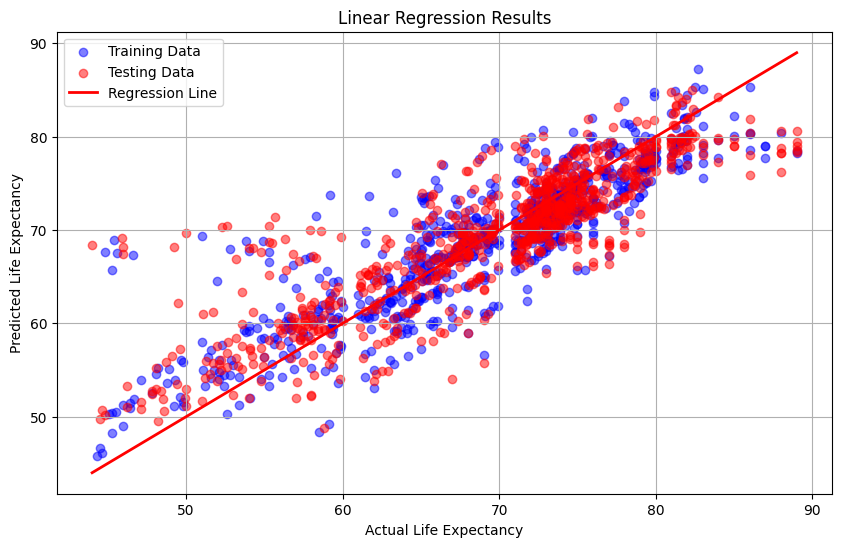

In [40]:
plt.figure(figsize=(10,6))

#Convert to Array so Matplotlib can be compatible with the Data
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train_pred = np.array(y_train_pred)
y_test_pred = np.array(y_test_pred)

#Scatter plot for both training data and testing data
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Testing Data', color='red', alpha=0.5)

#Min and Max value for training and testing data
min_val = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_val = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

#Plotting the regression line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Regression Line')

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.title('Linear Regression Results')
plt.grid(True)
plt.show()

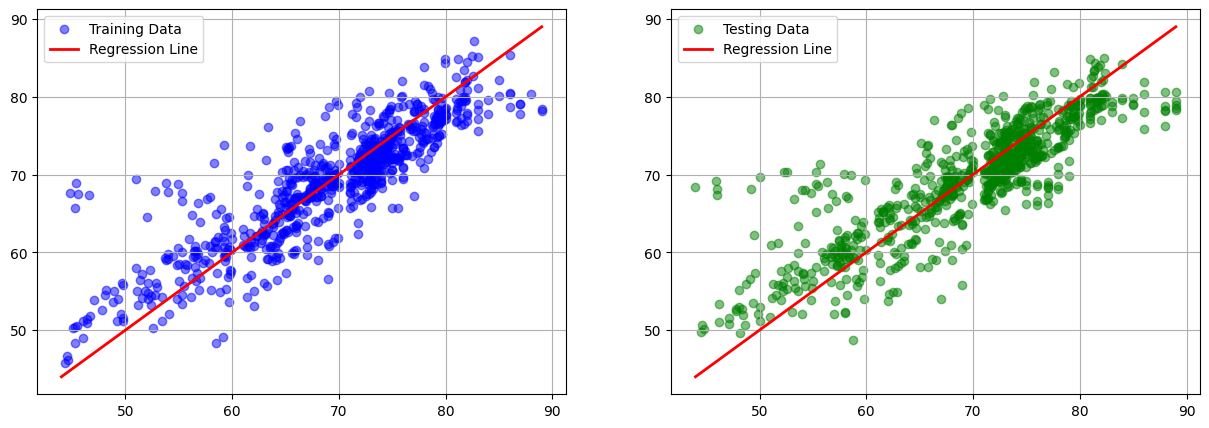

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Regression Line')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.5)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Regression Line')
plt.grid(True)
plt.legend()

plt.show()

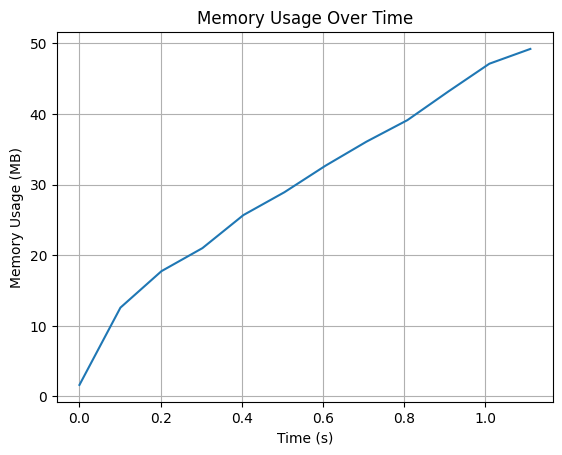

In [42]:
import os
import subprocess

# Run the script with memory profiling using subprocess
subprocess.run(['mprof', 'run', 'statistics/memoryAndCpu.py'])

# List all memory usage data files the output is structured like this: id filename time date
files = subprocess.check_output(['mprof', 'list']).decode('utf-8').strip().split('\n')

# Get the most recent memory usage data file (sorted by id)
filename = files[-1].split()[1]

# Read the memory usage data file
output = open(filename, 'rb').read()

# Clean up the memory usage data file by running it through mprof clean
os.system(f'mprof clean')

# Parse the memory data and extract memory usage values and timestamps
timestamps = []
memory_usages = []
first_timestamp = None

# Iterate through each line in the memory data
for line in output.decode('utf-8').strip().split('\n'):
    # Skip the first line
    if line.startswith('CMDLINE'):
        continue
    parts = line.strip().split()
    if len(parts) == 3:
        try:
            # Make the first timestamp 0
            if first_timestamp is None:
                first_timestamp = float(parts[2])
                
            # Calculate the timestamp and memory usage
            timestamp = float(parts[2]) - first_timestamp
            memory_usage = float(parts[1])
            timestamps.append(timestamp)
            memory_usages.append(memory_usage)
        except ValueError:
            pass  # Skip lines that don't have valid data

# Create a memory usage plot
plt.plot(timestamps, memory_usages)
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Over Time')
plt.grid(True)

# Show the memory usage plot
plt.show()


In [43]:
# Open the file cpu_usage_measurements.csv for reading
with open('cpu_usage_measurements.csv', 'r') as f:
    # Skip the first line
    f.readline()
    # Read all lines from the file into a list
    cpuLines = f.readlines()

# Open the file time_measurements.csv for reading
with open('time_measurements.csv', 'r') as f:
    # Skip the first line
    f.readline()
    # Read all lines from the file into a list
    timeLines = f.readlines()

# Delete the file time_measurements.csv
os.remove('time_measurements.csv')
# Delete the file cpu_usage_measurements.csv
os.remove('cpu_usage_measurements.csv')

# Make it a float
cpuLines = [float(line.strip()) for line in cpuLines]

timeLines = [float(line.strip()) for line in timeLines]



# Show the data on a plot
plt.plot(timeLines, cpuLines)
plt.xlabel('Time (s)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage Over Time')
plt.grid(True)

FileNotFoundError: [Errno 2] No such file or directory: 'cpu_usage_measurements.csv'